# CH3.3 성능 측정 ( 분류 문제 ) 

## 1. 성능 지표

### 우선, 가장 기본이 되는 표부터 확인

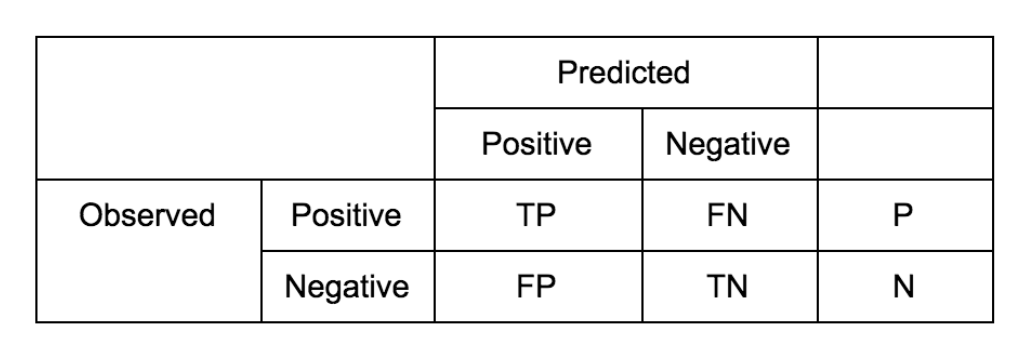

### TP : True Positive, 병이 걸렸다고 진단을 내렸는데 실제로 병에 걸렸음.
### FP : False Positive, 병에 걸렸다고 진단을 내렸는데 실제로는 병에 걸리지 않았음.
### FN : False Negative, 병에 안 걸렸다고 진단을 내렸는데 실제로 병에 걸렸음.
### TN : True Negative, 병에 안 걸렸다고 진단을 내렸는데 실제로 병에 걸리지 않았음.
### P(= 실제 Positive ) = TP+FN , N(= 실제 Negative) = TN+FP

### => 가장 좋은 모델은 FP=FN=0이면 더할나위 없이 완벽한 분류 모델이겠지만 어렵다

### 지표 1 ) Accuracy(정확도)
#### 전체 데이타중에서, 제대로 분류된 데이타의 비율
#### ACC = (TP + TN)  / (전체 데이타 수 = P + N)

### 지표 2 ) Error Rate
#### Error Rate는 Accuracy 와 반대로, 전체 데이타 중에서 잘못 분류한 비율
#### ERR = (FN+FP) / (전체 데이타수 = P+N)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

### 지표 3 ) Sensitivity (Recall or True positive Rate, 민감도, 재현율)
#### 맞는 것들 중에서 몇개나 진짜로 맞다고 분류했는 지

####  원래 Positive 데이타 수에서 Positive로 분류된 수 
####  => 전부 다 병에 걸렸다고 진단을 내리는 의사가 있으면 Sensitivity ==1
#### SN = (TP) / P = TP / (TP+FN)
#### * ROC 의 y축

### 지표 4 ) Precision (정밀도)
#### 맞다 한 것중에 진짜 맞은 비율

#### Positive로 예측한 내용 중에, 실제 Positive의 비율
#### PREC = TP / (TP+FP) 
#### Precision이 높다는 것의 의미는, 즉 만약 양성이라고 조언을 내린다면 진짜로 병에 걸렸을 확률이 높다는 것. 


#### 정밀도, 민감도 모두 높으면 좋지만 Trade Off 가 있다.
#### 한국어로는 얼마나 용한 지(?) 정도가 될 듯

#### ---------------------------------------------------------------------------------------------------------------------------------------------------


### 지표 5 ) Specificity (True negative rate)
#### Specificity 값은 Negative 로 판단한것중에, 실제 Negative 값의 비율
#### SPEC = TN / (TN + FN)
#### 즉, 병에 걸리지 않았다고 한 것 중 실제로 병에 걸리지 않은 비율로 얼마나 비환자를 잘 집어내는 지에 대한 지표
#### * ROC x축에 1-Specificity 값이 들어간다.

### 지표 6 ) False Positive rate 
#### 실제로는 음성인데 양성으로 진단 내리는 경우(병 없는데 있는 것으로 잘못 진단.)
#### FP / N = FP / (FP+TN)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------




### 지표 7 ) F1 score = 정밀도와 재현도(민감도)의 조화 평균

#### F1 = 2 / {(1/정밀도) + (1/재현율)}



## 2. GRAPH

### ROC Curve (Receiver Operating Characeteristic Curve), PR Curve (Precision Recall Curve)

#### 결론부터 이야기하자면 ROC Curve가 가장 흔하게 사용되지만,

#### 1) 데이터 라벨의 분포가 심하게 불균형할 경우나
* 예를 들어 이상 거래 검출 시나리오의 경우 정상 거래의 비율이 비정상 거래에 비해서 압도적으로 많은 경우 (98%, 2%) 

#### 2) 거짓음성(FN)보다 거짓양성(FP)이 더 중요할 때 PR 곡선을 사용한다.


## ROC CURVE 

### TPR(True Positive Rate, 세로 축)~FPR(False Positive Rate, 가로 축) graph.
### TPR = (TP) / (TP+FN) = Sensitivity (지표 3)
### FPR = 1-TNR(True Nagative Rate) = 1 - TN / (TN+FN) = 1 - Specificity

#### FPR는 낮을수록(x축 : 왼쪽방향일수록), TPR는 높을수록(y축 : 위쪽방향일수록) 좋은 분류기. 즉, 점선으로부터 멀어질수록 좋은 분류기이다.



## 3. 오차 행렬

### 행 : 실제값 / 열 : 예측값으로
#### 예컨대, 실제값이 5인데 3으로 잘못 예측(분류)된 값을 보고 싶다면 5행 3열의 값을 보면 됨.

## 4. k-Fold Cross Validation

#### model 검증, hyper-parameter 튜닝 등에 활용

#### k=5인 k-Fold Cross Validation 예시

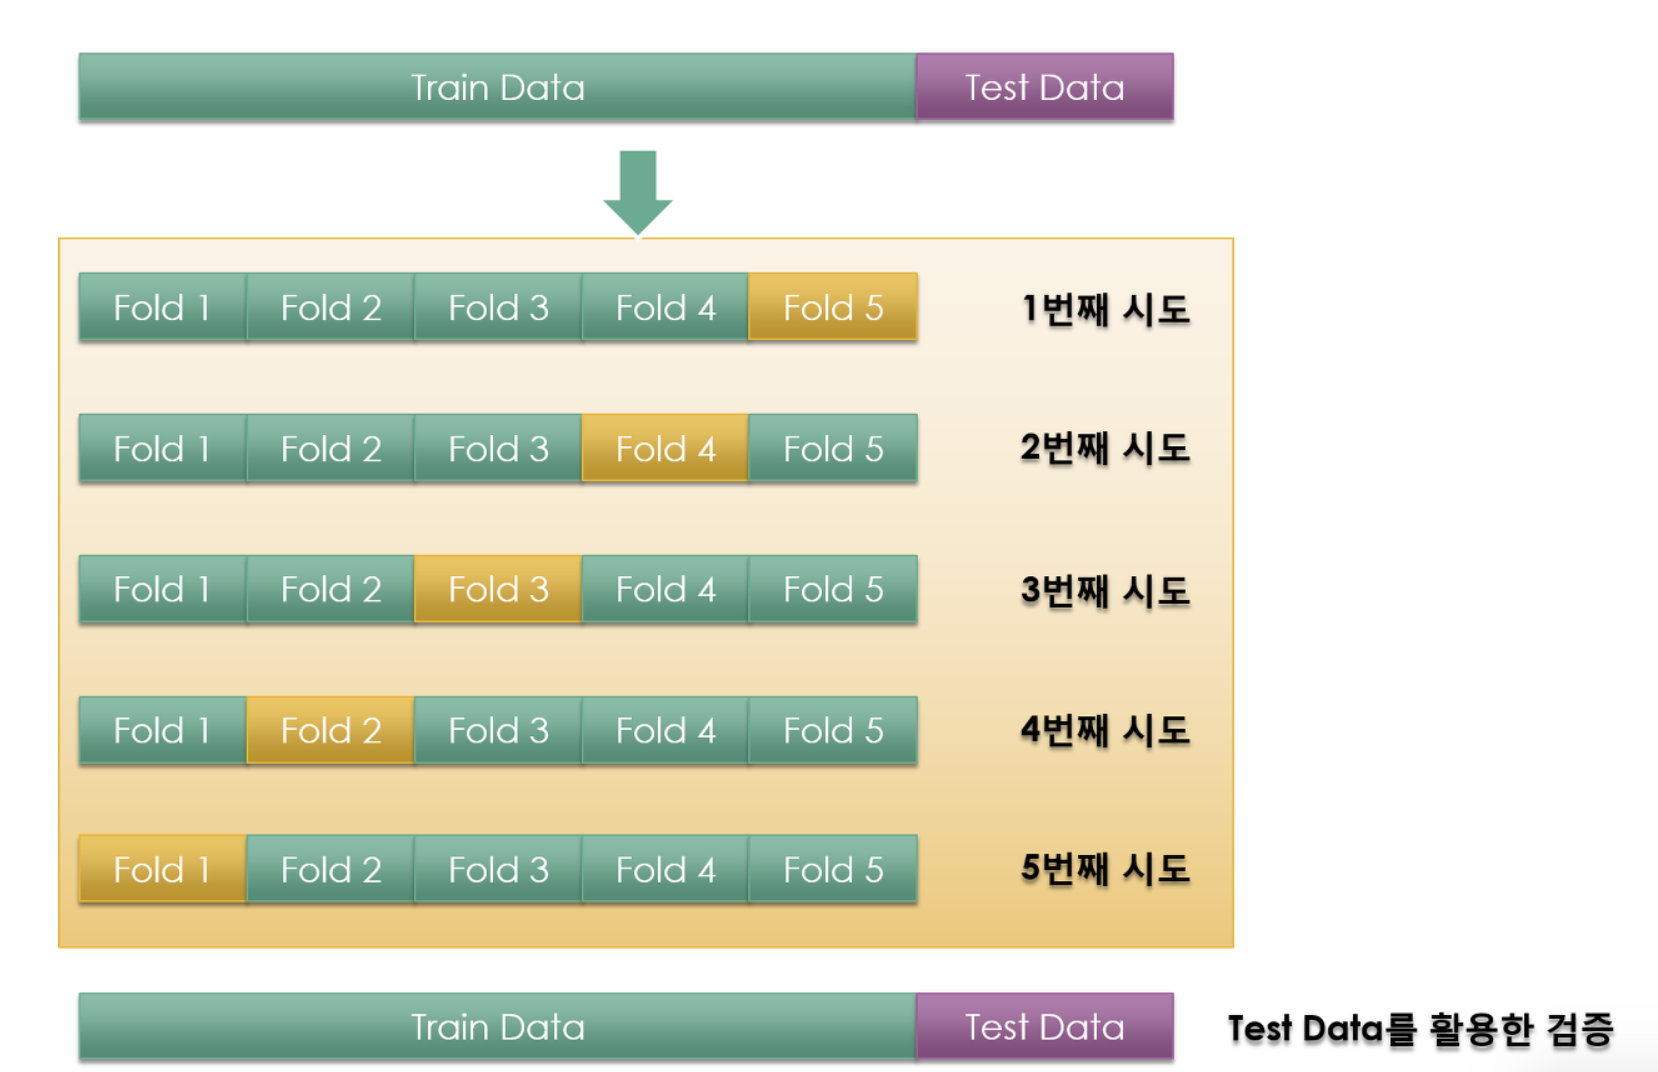

## 실제 sklearn로 구현

In [1]:
# import dependencies and data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784',version=1)
import pandas as pd
import numpy as np
X, y = mnist["data"], mnist["target"]


#### StratifiedShuffleSplit
#### 정확한 K-Fold Cross Validation은 아님
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.1,random_state=25)

# get_n_splits(X,y) : Returns the number of splitting iterations in the cross-validator
print('number of iterations are %s.'%split.get_n_splits(X,y)) 

# split(X, y[, groups]) : Generate indices to split data into training and test set.
# StratifiedShuffleSplit은 y값을 기준으로 stratified sampling
split.split(X,y)

# 우선 이렇게 5번의 random & stratified된 set을 얻어보았다. 이걸로 이것저것 다 해 볼 거임.
for train_index, test_index in split.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

number of iterations are 3.
TRAIN: [20593 52817  4226 ... 56400 69459   740] TEST: [41146  7361 16926 ... 42264 35160 14463]
TRAIN: [30808 68603 27631 ... 11500 22159 51721] TEST: [62355  8194 37009 ... 64793 55101 12372]
TRAIN: [26058 45738 19669 ... 15926 57280 51683] TEST: [59425 41365  9073 ... 19555 28881 34635]


In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

#### sklearn.metrics.confusion_matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

#### Confusion Matrix C 에 대해
#### (i,j) 성분은 실제값은 i 값이지만 예측값은 j 값으로 나온 것 의미

In [33]:
sgd_clf = SGDClassifier(max_iter = 20)

i=1
for train_index, test_index in split.split(X, y):
    print("=================================================================================")
    print("ITERATION : %s."%i)
    i=i+1
    clone_clf = clone(sgd_clf) # 매번 초기화해주는 것 아닐까??
    print("TRAIN INDEX:", train_index, "TEST INDEX:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 책처럼 GSDClassifer model : fit -> predict
    clone_clf.fit(X_train,y_train)
    y_pred= clone_clf.predict(X_test)
    # 먼저, 지표 1) Accuracy= (TP + TN) / (전체)   확인
    n_correct = sum(y_pred == y_test)
    Accuracy = n_correct / len(y_pred)
    print("Accuracy is %s."%Accuracy )
    # 지표 2 ) Error rate = 1- Accuracy 이므로 생략
    # Confusion_matrix 
    conf_mat = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print(conf_mat)
    print("=================================================================================")    
    
    

ITERATION : 1.
TRAIN INDEX: [20593 52817  4226 ... 56400 69459   740] TEST INDEX: [41146  7361 16926 ... 42264 35160 14463]


/Users/ieunpyo/anaconda3/envs/work/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Accuracy is 0.8755714285714286.
[[670   0   3   0   1   1   9   0   6   0]
 [  0 685  10   3   2   2   7   1  73   5]
 [  6   2 593  16   9   3  26  11  31   2]
 [  0   2  16 621   1  12   6   5  42   9]
 [  0   2   3   1 628   3  10   4  11  20]
 [ 13   3   4  21  13 450  33   4  77  13]
 [  2   1   3   0   3   5 668   0   5   1]
 [  4   2   9   2   2   1   1 684   7  17]
 [ 11   7  19  14   6   8  18  16 580   4]
 [  7   0   5   6  27   3   1  81  16 550]]
ITERATION : 2.
TRAIN INDEX: [30808 68603 27631 ... 11500 22159 51721] TEST INDEX: [62355  8194 37009 ... 64793 55101 12372]


/Users/ieunpyo/anaconda3/envs/work/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Accuracy is 0.8708571428571429.
[[646   0  16   4   0   7  10   6   1   0]
 [  0 764  11   3   0   1   0   2   5   2]
 [  3  13 633   8   3   1  16  12   8   2]
 [  1   4  83 562   1  29   4  14   3  13]
 [  1   4  16   2 573   6  20  18  18  24]
 [  4   3   4  17   4 543  19   7  17  13]
 [  2   2   3   0   0   6 668   4   3   0]
 [  0   3  16   1   4   3   0 687   2  13]
 [  1  49  53  16   1  56  12  15 454  26]
 [  2   4   8  10  11  19   1  70   5 566]]
ITERATION : 3.
TRAIN INDEX: [26058 45738 19669 ... 15926 57280 51683] TEST INDEX: [59425 41365  9073 ... 19555 28881 34635]
Accuracy is 0.8817142857142857.
[[667   1   5   5   1   3   1   0   6   1]
 [  0 765   3   3   1   2   0   2  10   2]
 [  6  10 618  20   7   2   3   6  25   2]
 [  2   4  16 672   2   2   0   3  10   3]
 [  4   6   7   1 579   0   2   7  41  35]
 [  8   9   7  74   5 467   6   1  49   5]
 [ 13  15  33   4   3  14 590   1  15   0]
 [  1   7   6  15   7   0   0 658   7  28]
 [  3  25  18  36   2  18   3   3 566

/Users/ieunpyo/anaconda3/envs/work/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [40]:
sgd_clf = SGDClassifier()

# y ==5 만 분류하는 이진 분류문제 필요
# why? 다른 지표들은 이진 분류문제에서만 나온다,,,
X, y = mnist["data"], mnist["target"]
y = (y=='5')
split.split(X,y)
 
i=1
for train_index, test_index in split.split(X, y):
    print("=================================================================================")
    print("ITERATION : %s."%i)
    i=i+1
    clone_clf = clone(sgd_clf) # 매번 초기화해주는 것 아닐까??
    print("TRAIN INDEX:", train_index, "TEST INDEX:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 책처럼 GSDClassifer model : fit -> predict
    clone_clf.fit(X_train,y_train)
    y_pred= clone_clf.predict(X_test)
    # 먼저, 지표 1) Accuracy= (TP + TN) / (전체)   확인
    n_correct = sum(y_pred == y_test)
    Accuracy = n_correct / len(y_pred)
    print("Accuracy is %s."%Accuracy )
    # 지표 2 ) Error rate = 1- Accuracy 이므로 생략
    # Confusion_matrix 
    conf_mat = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion_matrix")
    TP = conf_mat[0,0] # 실제값은 0(=Positive), 예측값은 0(=Positive)
    FN = conf_mat[0,1] # 실제값은 0(=Positive), 예측값은 1(=Negative)
    FP = conf_mat[1,0] # 실제값은 1(=Negative), 예측값은 0(=Positive)
    TN = conf_mat[1,1] # 실제값은 1(=Negative), 예측값은 1(=Negative) 
    print(conf_mat)
    # 각종 지표들
    SN = ((TP)/(TP+FN))
    print("Sensitivity == %s."%SN )
    PREC = (TP / (TP+FP))
    print("Precision == %s."%PREC )
    SPEC = (TN / (TN + FN))
    print("Specificity == %s."%SPEC )
    FP_rate = (FP / (FP+TN))
    print("False Positive Rate == %s."%FP_rate )
    F1 = 2 / ((1/PREC) + (1/SN))
    print("F1 rate == %s."%F1 )
    print("=================================================================================")    
    
    
    
    
    
    

ITERATION : 1.
TRAIN INDEX: [28880 43212 16339 ... 60639 66043 58768] TEST INDEX: [11022 64946 53337 ... 23443 30636 37038]
Accuracy is 0.9655714285714285.
Confusion_matrix
[[6351   18]
 [ 223  408]]
Sensitivity == 0.9971738106453132.
Precision == 0.966078491025251.
Specificity == 0.9577464788732394.
False Positive Rate == 0.35340729001584786.
F1 rate == 0.9813798964691339.
ITERATION : 2.
TRAIN INDEX: [26520  3981 50163 ... 60369 45473 34656] TEST INDEX: [16753 66665  3589 ... 49112 26394 41828]
Accuracy is 0.964.
Confusion_matrix
[[6295   74]
 [ 178  453]]
Sensitivity == 0.9883812215418433.
Precision == 0.9725011586590453.
Specificity == 0.8595825426944972.
False Positive Rate == 0.2820919175911252.
F1 rate == 0.9803768883351501.
ITERATION : 3.
TRAIN INDEX: [21280 46757 33881 ... 65453 46692 15232] TEST INDEX: [14831 23471 10133 ... 63807 10676 37784]
Accuracy is 0.9678571428571429.
Confusion_matrix
[[6281   88]
 [ 137  494]]
Sensitivity == 0.9861830742659758.
Precision == 0.978653786

### PR Curve, ROC Curve를 그리기

#### * precision_recall_curve
Compute precision-recall pairs for different probability thresholds

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

#### * SGDClassifier.decision_function()

#### proba  사용하는 경우가 있고 decision_function 사용하는 경우가 있다.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

#### * roc_curve
Compute Receiver operating characteristic (ROC)

#### sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


ITERATION : 1.
TRAIN INDEX: [28880 43212 16339 ... 60639 66043 58768] TEST INDEX: [11022 64946 53337 ... 23443 30636 37038]
ITERATION : 2.
TRAIN INDEX: [26520  3981 50163 ... 60369 45473 34656] TEST INDEX: [16753 66665  3589 ... 49112 26394 41828]
ITERATION : 3.
TRAIN INDEX: [21280 46757 33881 ... 65453 46692 15232] TEST INDEX: [14831 23471 10133 ... 63807 10676 37784]


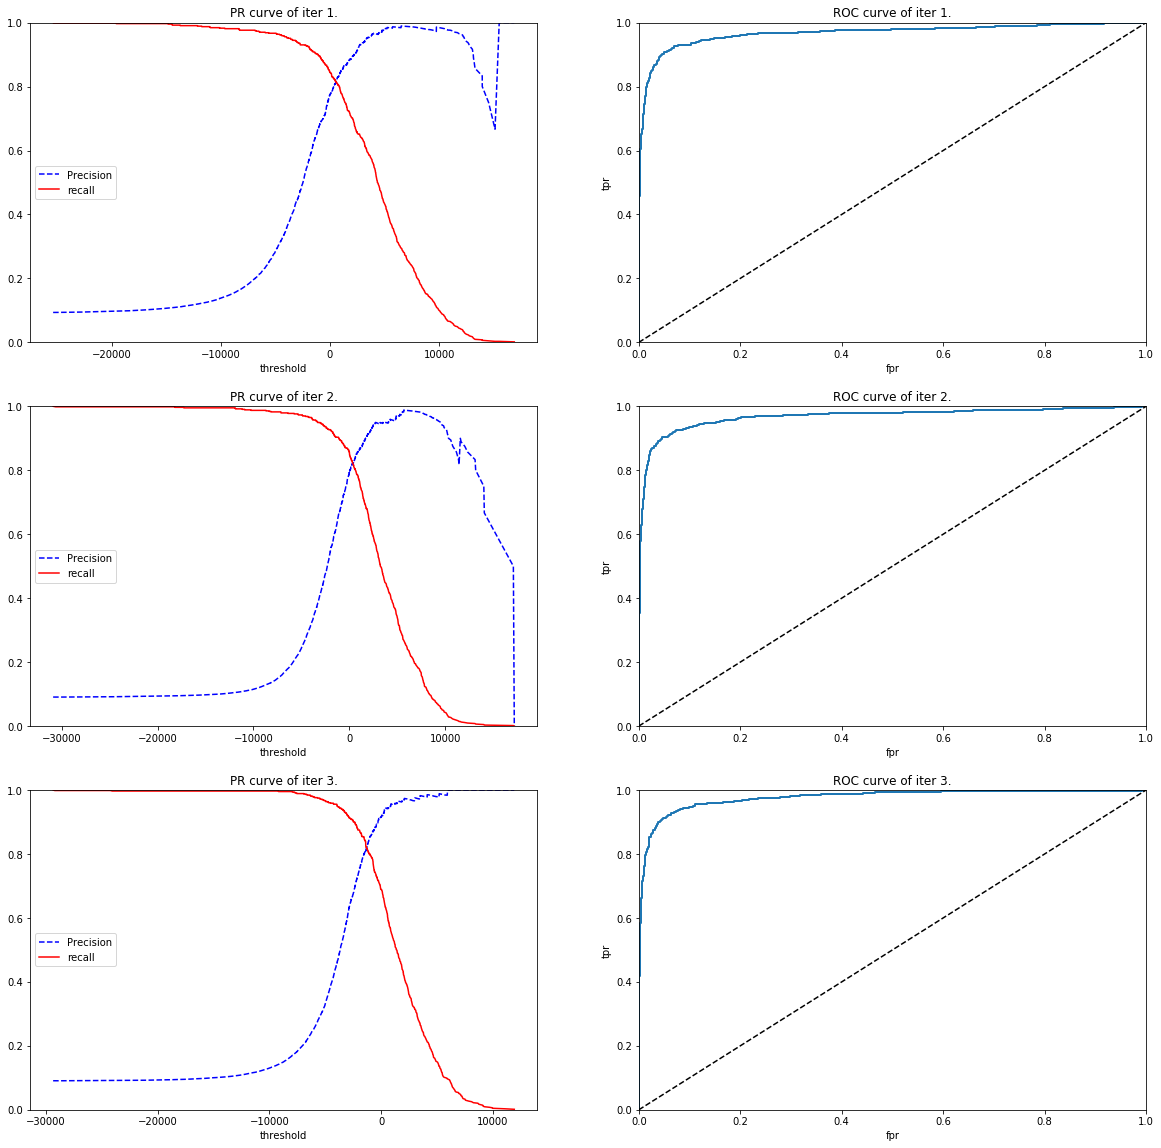

In [111]:
import matplotlib.pyplot as plt

sgd_clf = SGDClassifier()

# y ==5 만 분류하는 이진 분류문제 필요
# why? 다른 지표들은 이진 분류문제에서만 나온다,,,
X, y = mnist["data"], mnist["target"]
y = (y=='5')
split.split(X,y)


n_iter = split.get_n_splits()

i=0; fig, ax = plt.subplots(n_iter,2,figsize=[20,20]) 

for train_index, test_index in split.split(X, y):
    print("=================================================================================")
    print("ITERATION : %s."%(i+1))
    clone_clf = clone(sgd_clf) # 매번 초기화해주는 것 아닐까??
    print("TRAIN INDEX:", train_index, "TEST INDEX:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 책처럼 GSDClassifer model : fit -> predict
    clone_clf.fit(X_train,y_train)
    y_pred= clone_clf.predict(X_test)
    y_proba = clone_clf.decision_function(X_test)
    # PR curve data - precisions, recalls on each threshold
    precs, recalls, thresholds_PR = precision_recall_curve(y_test, y_proba, pos_label=None, sample_weight=None) 
    # ROC curve data - fpr(false positive rate), tpr(true positive rate) on each threshold
    fpr, tpr, thresholds_ROC = roc_curve(y_test,y_proba)
    
    # Graphing
    # PR curve
    ax[i,0].set_title('PR curve of iter %d.'%(i+1))
    ax[i,0].plot(thresholds_PR,precs[:-1],"b--",label="Precision")
    ax[i,0].plot(thresholds_PR,recalls[:-1],'r',label="recall")
    ax[i,0].set_xlabel("threshold")
    ax[i,0].legend(loc='center left')
    ax[i,0].set_ylim([0,1])
    
    # ROC curve
    ax[i,1].set_title('ROC curve of iter %d.'%(i+1))
    ax[i,1].plot(fpr,tpr,linewidth=2)
    ax[i,1].plot([0,1],[0,1],'k--') # 0,0 ~ 1,1 인가 부네. x=[0,1] ,y =[0,1]
    ax[i,1].axis([0,1,0,1])
    ax[i,1].set_xlabel('fpr')
    ax[i,1].set_ylabel('tpr')
    i=i+1
    
    

    
    

    
    

## 추가 내용